In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.35)

In [2]:
df = pd.read_csv('cleaned_vg_df.csv', parse_dates=['release_year','release_month','release_day'])
df = df.drop('Unnamed: 0', axis=1)
df.head()

,score_phrase,Name,url,Platform,score,editors_choice,release_year,release_month,release_day,Release_Date,...,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,_merge
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Y,2012-01-01,9,12,2012-09-12,...,0.02,0.27,1.25,88.0,71.0,8.6,348.0,"Tarsier Studios, Double Eleven",E,both
1,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,N,2012-01-01,9,11,2012-09-11,...,0.00,0.05,0.66,83.0,44.0,6.6,86.0,Electronic Arts,E10+,both
2,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,N,2012-01-01,9,11,2012-09-11,...,0.00,0.09,0.64,84.0,22.0,6.8,60.0,Electronic Arts,E10+,both
3,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,Y,2012-01-01,9,11,2012-09-11,...,0.00,0.27,2.31,90.0,69.0,7.9,2954.0,ArenaNet,T,both
4,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,N,2012-01-01,9,11,2012-09-11,...,0.13,0.13,0.85,82.0,50.0,8.2,193.0,Namco Bandai Games,T,both


In [3]:
df.describe()

/Users/macbook/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,score,Year_of_Release_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,7501.000000,7381.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,5945.000000,5945.000000,5389.000000
mean,7.026596,2005.837420,0.383544,0.218455,0.063970,0.074399,0.740665,70.171068,28.618671,194.712192
std,1.717498,4.703958,0.911736,0.650060,0.284952,0.255306,1.851322,13.901481,19.278448,631.256358
min,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000,17.000000,4.000000,4.000000
25%,6.000000,NaN,0.060000,0.010000,0.000000,0.010000,0.110000,NaN,NaN,NaN
50%,7.400000,NaN,0.150000,0.050000,0.000000,0.020000,0.270000,NaN,NaN,NaN
75%,8.400000,NaN,0.380000,0.190000,0.010000,0.060000,0.720000,NaN,NaN,NaN
max,10.000000,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
len(df.Name.unique())

4844

## Sales by Genre

I wanted to see how well each genre did by sales. To see the general trend of sales, action is the most popular genre or videogames. This trend is consistent in the other regions but Japan. The most popular game genre in Japan is Role-Playing. If you look at the role playing genre in other regions, Role-playing is in the mid-range of global sales and not as popoular. 

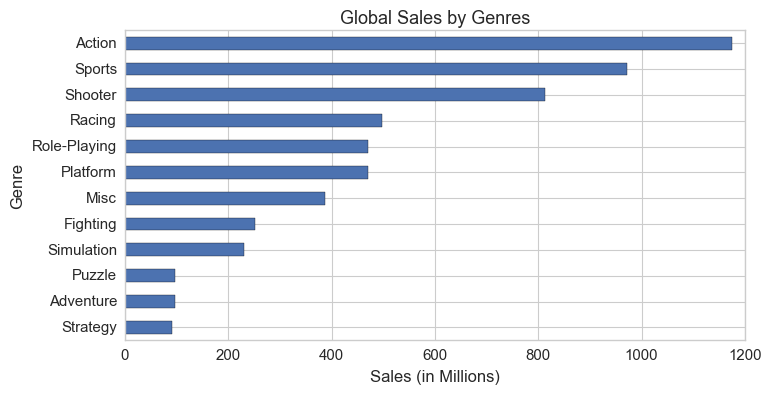

In [4]:
global_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values().plot(kind='barh',title='Global Sales by Genres',figsize=(8,4)).set_xlabel('Sales (in Millions)')
plt.show()


In [6]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False) 

Genre
Action          1174.68
Sports           972.03
Shooter          814.12
Racing           497.45
Role-Playing     470.34
Platform         470.13
Misc             386.75
Fighting         250.98
Simulation       231.52
Puzzle            98.00
Adventure         97.87
Strategy          91.86
Name: Global_Sales, dtype: float64

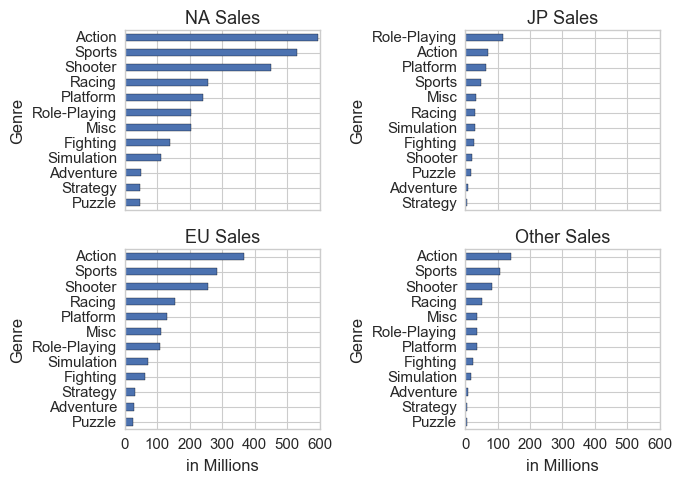

In [7]:
fig, axes = plt.subplots(2,2, sharex=True,figsize=(7,5))

NA_sales = df.groupby('Genre')['NA_Sales'].sum().sort_values().plot(kind='barh',title='NA Sales', ax=axes[0,0]).set_xlabel('in Millions')

JP_sales = df.groupby('Genre')['JP_Sales'].sum().sort_values().plot(kind='barh',title='JP Sales',ax=axes[0,1]).set_xlabel('in Millions')

EU_sales = df.groupby('Genre')['EU_Sales'].sum().sort_values().plot(kind='barh',title='EU Sales',ax=axes[1,0]).set_xlabel('in Millions')

Other_sales = df.groupby('Genre')['Other_Sales'].sum().sort_values().plot(kind='barh',title='Other Sales',ax=axes[1,1]).set_xlabel('in Millions')


plt.tight_layout()
plt.show()


In [8]:
df.groupby('Genre')['NA_Sales'].sum().sort_values().sort_values(ascending=False)

Genre
Action          596.33
Sports          530.79
Shooter         450.37
Racing          257.50
Platform        239.77
Role-Playing    205.22
Misc            203.21
Fighting        137.67
Simulation      110.11
Adventure        51.07
Strategy         47.63
Puzzle           47.29
Name: NA_Sales, dtype: float64

## Release Months by Genre


The months of October and November have the most number of game releases across all genres. This trend might account for the upcoming Holidays. I initially thought that video game release dates might correlate with summer vacation, but the data actually shows these months have the lowest number of releases. Such low releases during the summer months may correlate with how often people vacation. It might be interesting to show the correlation between number of releases in the summer by the number of vacations people take during the months of June-August. Apparently these months are also not that busy for a lot of businesses as well. 

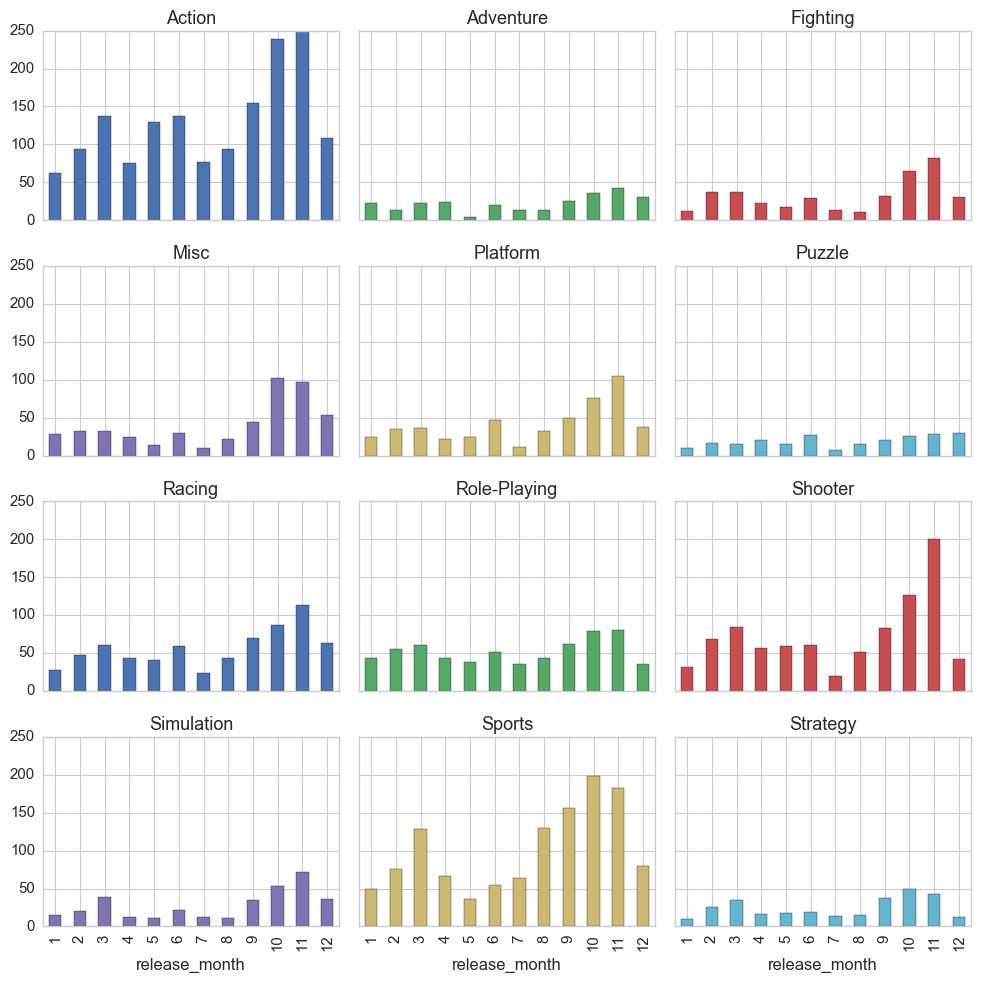

In [9]:
r = df[['Genre','release_month']]
r = r.groupby('Genre')['release_month'].value_counts()
r =r.unstack(0)

#setting index to int
r.index= r.index.astype(int)
r = r.sort_index()


#fig, ax1 = subplots()
r.plot(kind='bar',subplots=True, layout=(4,3), figsize=(10,10), sharex=True,legend=False, sharey=True)
plt.tight_layout()
plt.ylabel('Release Month')
plt.show()

## Sales by Platform

Each Platform was grouped together by its sum of sales. The Playstation 2 is the most popular platform given by its global sales with the Xbox 360 coming in second. Both the PS2 and XBOX360 came out the same year as these two are competitors. It's surprising the PS2 is the most popular platform given the debate between which is the best. However, once the platform sales were grouped by region, the PS2 is usually in the top 2 spots for best platform. In North America, the most popular platform is the XBOX 360 and Japan the Nintendo DS.

The later console generations, like the PS4 and XBOX ONE, did not do so well in sales. And may attribute to the fact that PC gaming became more popular over the years. It's worth exploring at which point in time did PC gaming became more popular than console gaming. 

With the rise of PC gaming, it's interesting to see PC sales so low in Japan.

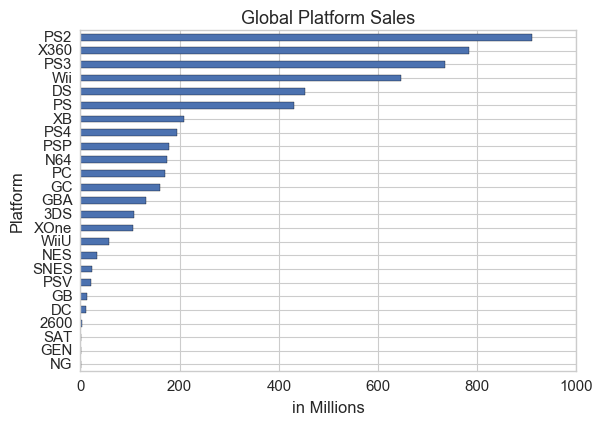

In [41]:
df.groupby('Standard_Plat')['Global_Sales'].sum().sort_values().plot(kind='barh', title='Global Platform Sales').set_xlabel('in Millions')
plt.ylabel('Platform')
plt.show()

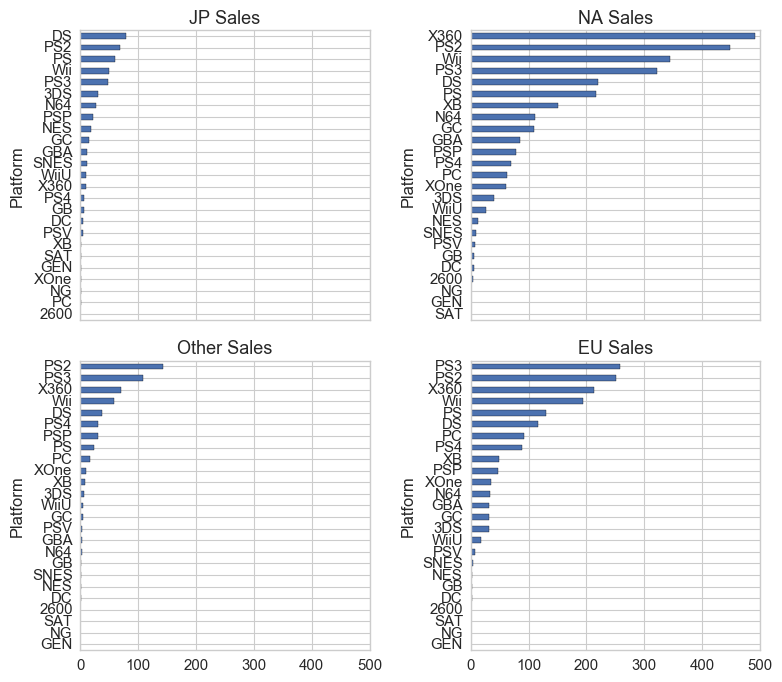

In [12]:
def plat_data (df, column1,column2):
    data =df.groupby(column1)[column2].sum().sort_values(ascending=True)
    return data

fig1, axes1 = plt.subplots(2,2, figsize=(8,7), sharex=True)

NA_plat = plat_data(df, 'Standard_Plat','NA_Sales').plot(kind='barh', ax=axes1[0,1], title='NA Sales').set_ylabel('Platform')
EU_plat = plat_data(df, 'Standard_Plat','EU_Sales').plot(kind='barh', ax=axes1[1,1], title='EU Sales').set_ylabel('Platform')
OTH_plat = plat_data(df,'Standard_Plat','Other_Sales').plot(kind='barh', ax=axes1[1,0], title='Other Sales').set_ylabel('Platform')
JP_plat = plat_data(df,'Standard_Plat','JP_Sales').plot(kind='barh', ax=axes1[0,0], title='JP Sales').set_ylabel('Platform')


#df.groupby('Standard_Plat')['NA_Sales','JP_Sales','EU_Sales','Other_Sales'].sum().sort_values(by=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'],axis=0,ascending=[True, True, False, True]).plot(kind='barh', subplots=True,
plt.tight_layout()
plt.show()

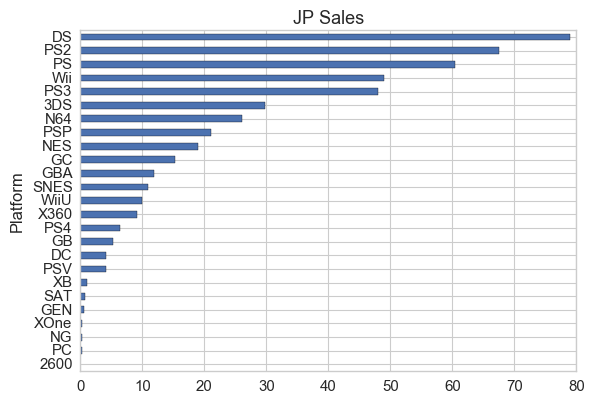

In [9]:
plat_data(df,'Standard_Plat','JP_Sales').plot(kind='barh', title='JP Sales').set_ylabel('Platform')
plt.show()

## Popular Games

These are the most popular games given by its sales. The most popular games are Wii games like Wii Sports and Mario Kart on the Wii. These popular Wii games, despite their popularity by sales, do not match their genre popularity overall.  The popularity of Wii Games are consistent with all of the regions but Japan once again.

The popularity in WiiSports in terms of sales may be an outlier because the game is included with the console at the time of purchase

###  Popular Games Globally

In [12]:
pop_glob = df.groupby(['Name','Genre','Platform'])['Global_Sales'].sum().sort_values(ascending=False)
pop_glob.head(20)

#what is that missing value right there??/ ***

Name                                          Genre     Platform     
Wii Sports                                    Sports    Wii              82.53
Mario Kart Wii                                Racing    Wii              35.52
Wii Sports Resort                             Sports    Wii              32.77
New Super Mario Bros.                         Platform  Nintendo DS      29.80
New Super Mario Bros. Wii                     Platform  Wii              28.32
Mario Kart DS                                 Racing    Nintendo DS      23.21
Wii Fit                                       Sports    Wii              22.70
Wii Fit Plus                                  Sports    Wii              21.79
Grand Theft Auto V                            Action    PlayStation 3    21.04
Grand Theft Auto: San Andreas                 Action    PlayStation 2    20.81
Brain Age: Train Your Brain in Minutes a Day  Misc      Nintendo DS      20.15
Grand Theft Auto V                            Action    Xbox 

### North America

There's a variety in the popularity of games with each respected platform. With Action, Shooter, and Sports being the most popular genres. The following game titles are consistent with what's considered to popular game titles given from experience as a gamer as well.

In [13]:
pop_na = df.groupby(['Name','Genre','Platform'])['NA_Sales'].sum().sort_values(ascending=False)
pop_na.head(20)

Name                            Genre     Platform     
Wii Sports                      Sports    Wii              41.36
Mario Kart Wii                  Racing    Wii              15.68
Wii Sports Resort               Sports    Wii              15.61
New Super Mario Bros. Wii       Platform  Wii              14.44
New Super Mario Bros.           Platform  Nintendo DS      11.28
Mario Kart DS                   Racing    Nintendo DS       9.71
Call of Duty: Black Ops         Shooter   Xbox 360          9.70
Grand Theft Auto V              Action    Xbox 360          9.66
Grand Theft Auto: San Andreas   Action    PlayStation 2     9.43
Call of Duty: Modern Warfare 3  Shooter   Xbox 360          9.04
Wii Fit Plus                    Sports    Wii               9.01
Wii Fit                         Sports    Wii               8.92
Call of Duty: Modern Warfare 2  Shooter   Xbox 360          8.52
Grand Theft Auto: Vice City     Action    PlayStation 2     8.41
Call of Duty: Black Ops II      Sh

### Europe

Genres are consistent with the sales. But what's interesting is that the Playstation is more popular as a platform. 

In [14]:

pop_eu = df.groupby(['Name','Genre','Platform'])['EU_Sales'].sum().sort_values(ascending=False)
pop_eu.head(20)

Name                                          Genre         Platform     
Wii Sports                                    Sports        Wii              28.96
Mario Kart Wii                                Racing        Wii              12.76
Wii Sports Resort                             Sports        Wii              10.93
Brain Age: Train Your Brain in Minutes a Day  Misc          Nintendo DS       9.20
New Super Mario Bros.                         Platform      Nintendo DS       9.14
Grand Theft Auto V                            Action        PlayStation 3     9.09
Wii Fit Plus                                  Sports        Wii               8.49
Wii Fit                                       Sports        Wii               8.03
Mario Kart DS                                 Racing        Nintendo DS       7.47
New Super Mario Bros. Wii                     Platform      Wii               6.94
The Sims 3                                    Simulation    PC                6.42
Grand Theft A

### Japan

The most popular platforms in Japan are all Japanese: Nintendo DS, Wii, Playstation. Portable hand held platforms are more popular than console or PC gaming in Japan. I wonder if this is a difference in culture and the way people live in Japan is more dense than the other regions? 

In [15]:
#Japan
pop_jp = df.groupby(['Name','Genre','Platform'])['JP_Sales'].sum().sort_values(ascending=False)
pop_jp.head(20)

Name                                            Genre         Platform            
New Super Mario Bros.                           Platform      Nintendo DS             6.50
Animal Crossing: Wild World                     Simulation    Nintendo DS             5.33
Brain Age 2: More Training in Minutes a Day     Puzzle        Nintendo DS             5.32
New Super Mario Bros. Wii                       Platform      Wii                     4.70
Animal Crossing: New Leaf                       Simulation    Nintendo 3DS            4.39
Dragon Quest IX: Sentinels of the Starry Skies  Role-Playing  Nintendo DS             4.35
Brain Age: Train Your Brain in Minutes a Day    Misc          Nintendo DS             4.16
Monster Hunter Freedom Unite                    Role-Playing  PlayStation Portable    4.13
Mario Kart DS                                   Racing        Nintendo DS             4.13
Mario Kart Wii                                  Racing        Wii                     3.79
Wii Spo

### Other

In [16]:
pop_oth = df.groupby(['Name','Genre','Platform'])['Other_Sales'].sum().sort_values(ascending=False)
pop_oth.head(20)

Name                                          Genre     Platform     
Grand Theft Auto: San Andreas                 Action    PlayStation 2    10.57
Wii Sports                                    Sports    Wii               8.45
Gran Turismo 4                                Racing    PlayStation 2     7.53
Grand Theft Auto V                            Action    PlayStation 3     3.96
Mario Kart Wii                                Racing    Wii               3.29
Wii Sports Resort                             Sports    Wii               2.95
Pro Evolution Soccer 2008                     Sports    PlayStation 2     2.93
New Super Mario Bros.                         Platform  Nintendo DS       2.88
FIFA Soccer 08                                Sports    PlayStation 2     2.46
Call of Duty: Black Ops II                    Shooter   PlayStation 3     2.42
New Super Mario Bros. Wii                     Platform  Wii               2.24
Wii Fit                                       Sports    Wii  

## Distribution of Game Scores



### Distribution of Scores from IGN

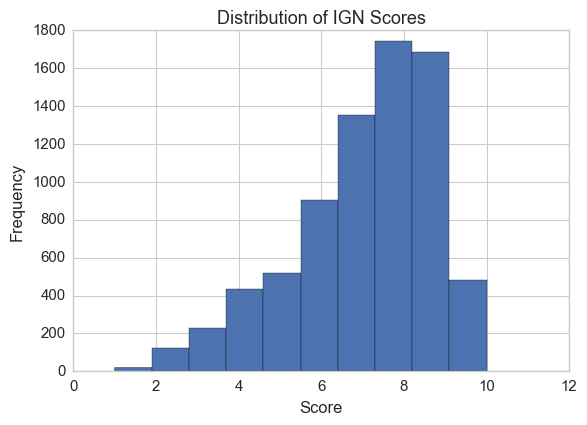

In [17]:
#IGN scores
plt.hist(df.score)
plt.title('Distribution of IGN Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [18]:
df.score.value_counts().sort_values(ascending=False)

8.0    605
7.0    557
8.5    404
9.0    371
6.0    354
7.5    329
6.5    299
5.0    266
5.5    230
7.8    220
4.0    202
8.8    173
8.4    164
4.5    149
7.9    146
8.3    144
6.8    126
8.7    124
8.2    116
7.7    115
8.9    106
9.5    106
3.5     97
7.4     95
8.6     84
3.0     84
7.3     84
7.6     82
9.3     81
9.2     77
      ... 
4.6     15
4.7     14
4.2     13
3.9     12
3.6     10
3.2     10
9.8      9
1.0      9
3.7      8
3.1      8
2.3      7
4.1      7
2.9      6
2.1      6
3.3      6
4.4      6
1.5      6
2.8      5
9.9      5
3.4      5
2.7      4
1.9      3
2.4      2
2.2      2
1.2      1
1.3      1
1.4      1
1.7      1
2.6      1
1.1      1
Name: score, dtype: int64

In [19]:
df.score.std()

1.7174983360483287

In [63]:
np.percentile(df.score, 75)

8.4000000000000004

In [20]:
df[df.score==10]['Name']

470         The Legend of Zelda: Ocarina of Time
4724                         Grand Theft Auto IV
4734                         Grand Theft Auto IV
4779    Metal Gear Solid 4: Guns of the Patriots
6184                        Super Mario Galaxy 2
6742              Uncharted 3: Drake's Deception
6773          The Legend of Zelda: Skyward Sword
7002                              The Last of Us
7013                          Grand Theft Auto V
7014                          Grand Theft Auto V
7309                          Grand Theft Auto V
7310                          Grand Theft Auto V
7328                          Grand Theft Auto V
7442        Metal Gear Solid V: The Phantom Pain
7443        Metal Gear Solid V: The Phantom Pain
7444        Metal Gear Solid V: The Phantom Pain
Name: Name, dtype: object

In [21]:
df.groupby(['Genre'])['score'].mean().sort_values(ascending=False)

Genre
Role-Playing    7.570906
Strategy        7.476014
Sports          7.274304
Shooter         7.173732
Platform        7.120160
Fighting        7.066324
Simulation      6.882301
Racing          6.857895
Puzzle          6.838983
Action          6.798717
Misc            6.495510
Adventure       6.480669
Name: score, dtype: float64

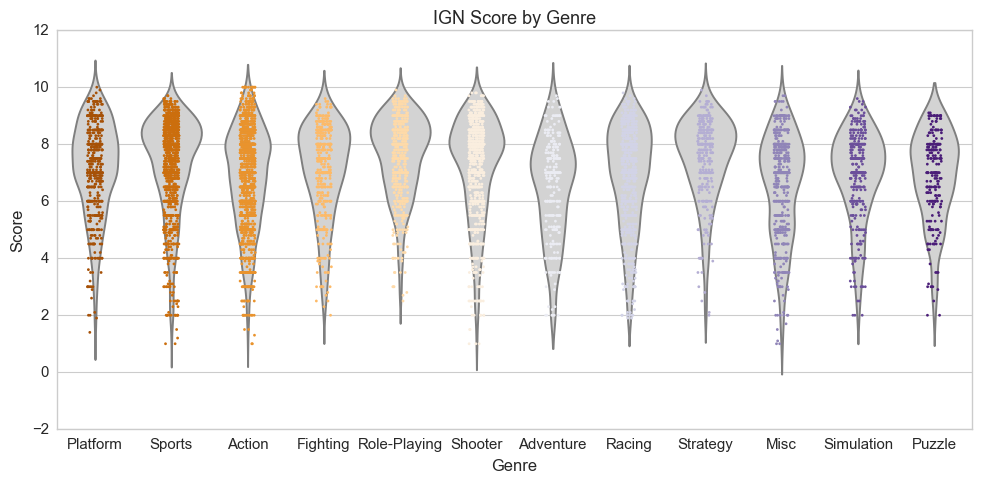

In [22]:
fig1, ax1 = plt.subplots(figsize=(10,5))

sns.stripplot(x='Genre', y='score', data=df, jitter=True, size=2, palette='PuOr')
sns.violinplot(x='Genre',y='score',data=df, inner=None, color='lightgray')
plt.ylabel('Score')
plt.title('IGN Score by Genre')
plt.tight_layout()
plt.show()

### Distribution of Critic Scores from VG

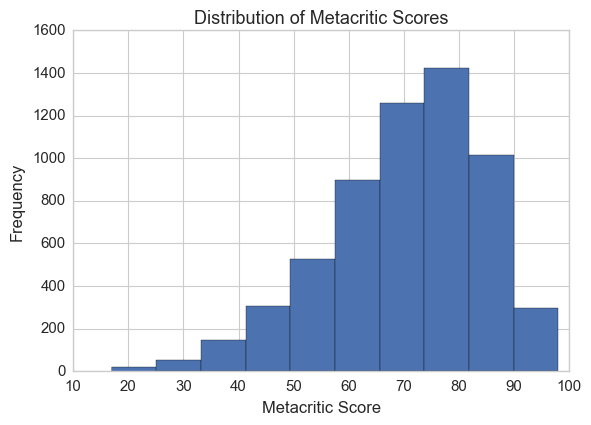

In [23]:
#critic score
critic= df.Critic_Score.dropna()

plt.hist(critic)
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')
plt.title('Distribution of Metacritic Scores')
plt.show()

In [24]:
df.Critic_Score.value_counts().sort_values(ascending=False)

75.0    193
80.0    189
70.0    187
81.0    186
71.0    185
78.0    180
76.0    176
73.0    172
79.0    171
82.0    171
74.0    167
83.0    164
77.0    163
72.0    162
69.0    153
84.0    145
68.0    144
66.0    135
85.0    129
65.0    125
63.0    123
61.0    120
67.0    119
86.0    112
64.0    110
62.0    110
60.0    110
58.0    100
59.0     99
89.0     98
       ... 
43.0     31
45.0     31
39.0     26
42.0     26
38.0     23
35.0     20
36.0     20
37.0     19
40.0     18
96.0     17
41.0     14
95.0     14
33.0     11
32.0     11
97.0     11
34.0      9
30.0      7
28.0      6
31.0      6
27.0      6
25.0      5
23.0      4
19.0      4
26.0      4
98.0      3
29.0      3
20.0      3
24.0      2
21.0      1
17.0      1
Name: Critic_Score, dtype: int64

In [25]:
df.Critic_Score.std()

13.901481275327441

In [26]:
df.Critic_Score.max()

98.0

In [27]:
df[df.Critic_Score==98.0]

,score_phrase,Name,url,Platform,score,editors_choice,release_year,release_month,release_day,Release_Date,...,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,_merge
837,Amazing,Tony Hawk's Pro Skater 2,/games/tony-hawks-pro-skater-2/ps-14304,PlayStation,9.6,Y,2000-01-01,9,19,2000-09-19,...,0.02,0.20,4.68,98.0,19.0,7.7,299.0,Neversoft Entertainment,T,both
4724,Masterpiece,Grand Theft Auto IV,/games/grand-theft-auto-iv/xbox-360-827005,Xbox 360,10.0,Y,2008-01-01,4,25,2008-04-25,...,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M,both
4734,Masterpiece,Grand Theft Auto IV,/games/grand-theft-auto-iv/ps3-793799,PlayStation 3,10.0,Y,2008-01-01,4,25,2008-04-25,...,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M,both


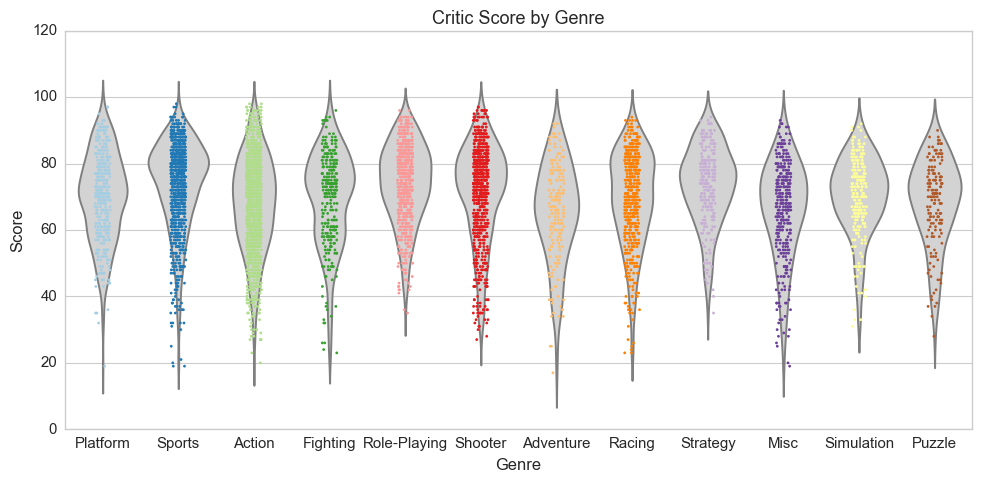

In [28]:
fig2, ax2 = plt.subplots(figsize=(10,5))

sns.stripplot(x='Genre', y='Critic_Score', data=df, jitter=True, size=2, palette='Paired')
sns.violinplot(x='Genre',y='Critic_Score',data=df, inner=None, color='lightgray')
plt.ylabel('Score')
plt.title('Critic Score by Genre')
plt.tight_layout()
plt.show()

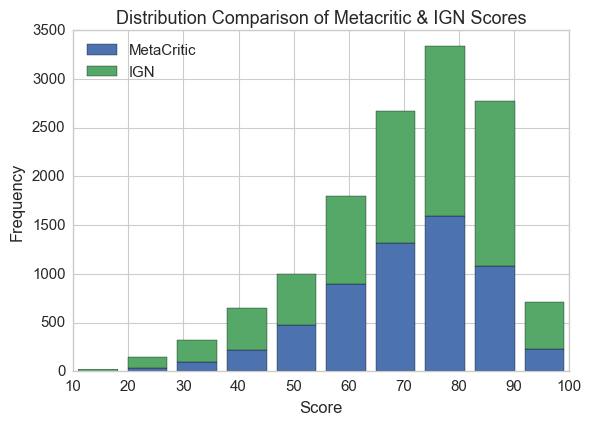

In [29]:
#What happens if we overlay the two distributions together
plt.hist([critic, df.score*10], stacked=True, label=['MetaCritic','IGN'])
plt.legend(loc=2)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution Comparison of Metacritic & IGN Scores')
plt.show()

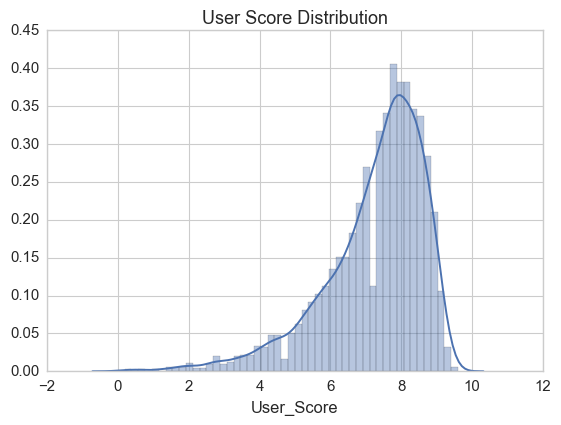

In [30]:
df['User_Score'] = pd.to_numeric(df['User_Score'].values, errors='coerce')
user = df['User_Score'].dropna()
sns.distplot(user)
plt.title('User Score Distribution')
plt.show()

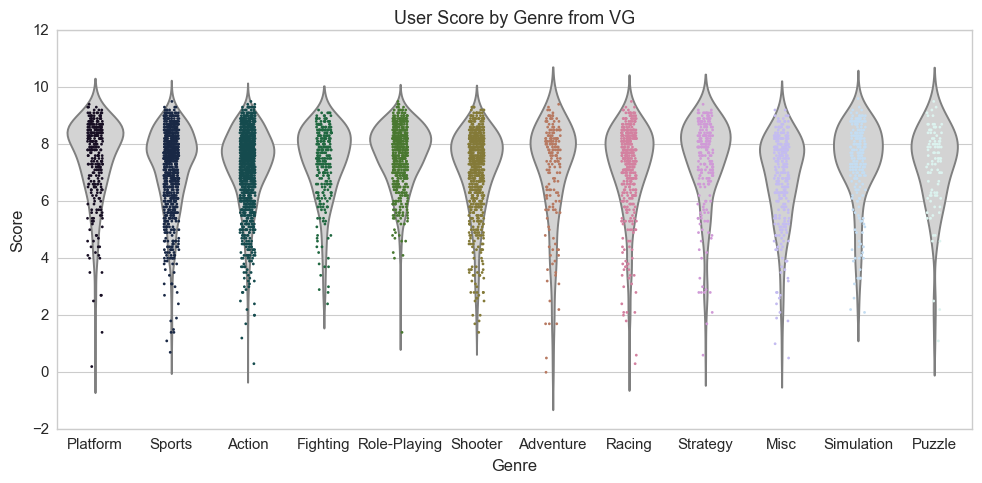

In [31]:
fig3, ax3 = plt.subplots(figsize=(10,5))

sns.stripplot(x='Genre', y='User_Score', data=df, jitter=True, size=2, palette='cubehelix')
sns.violinplot(x='Genre',y='User_Score',data=df, inner=None, color='lightgray')
plt.ylabel('Score')
plt.title('User Score by Genre from VG')
plt.tight_layout()
plt.show()

## Correlation between Critic Score and Global Sales

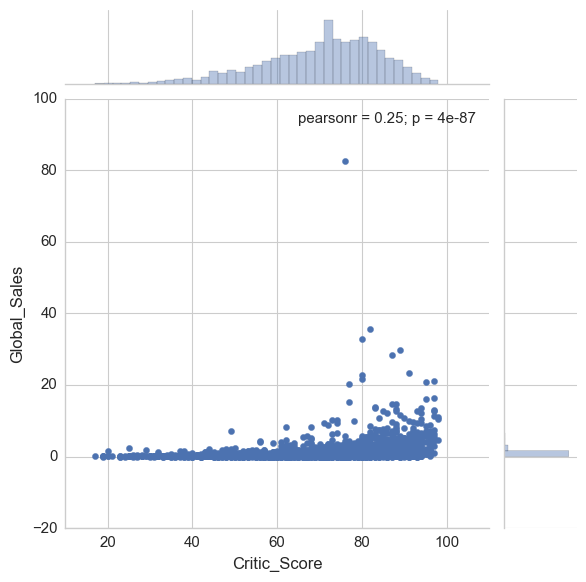

In [32]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df)
plt.show()

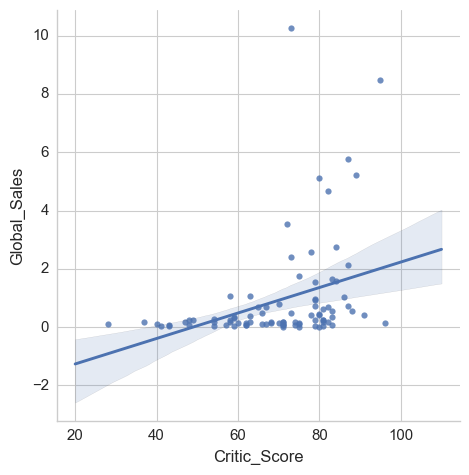

In [33]:
#critic score and global sales

#sampling from smaller sample
rans = df.sample(n=100)

sns.lmplot(x='Critic_Score', y='Global_Sales', data=rans)
plt.ylim((-1,5))
plt.axis('tight')
plt.show()

## Global Sales by Month

November had the highest number of sales globally. Sales start increasing at September through November with a sharp drop in sales in December. 

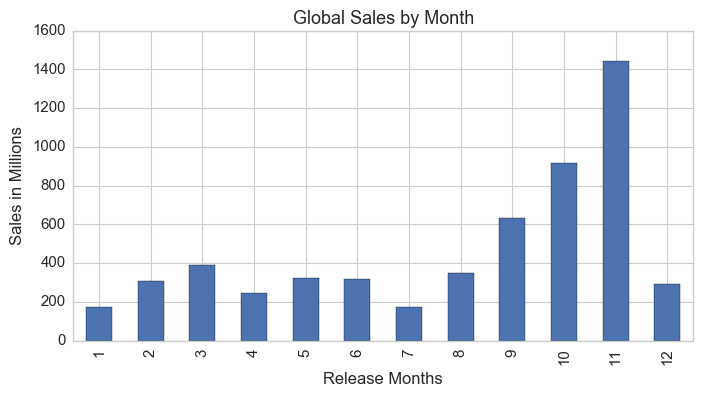

In [34]:
#which release months had the best sales 
month_by_sales = df.groupby('release_month')['Global_Sales'].sum()
month_by_sales.index = month_by_sales.index.astype(int)
mbs = month_by_sales.sort_index()
mbs.plot(kind='bar', title='Global Sales by Month', figsize=(8,4)).set_ylabel('Sales in Millions')
plt.xlabel('Release Months')
plt.show()

In [35]:
#global sales by month and platform
#sns.barplot(x='release_month',y='Global_Sales', hue='Platform', data=df)
#plt.show()

In [36]:
df.groupby('release_month')['Global_Sales'].sum().sort_values(ascending=False)

release_month
11    1441.90
10     914.78
9      630.94
3      389.27
8      350.91
5      323.82
6      317.80
2      308.03
12     290.88
4      243.67
7      172.00
1      171.73
Name: Global_Sales, dtype: float64

## How are video game sales doing over time?

Data was grouped together by its release year and resampled annually to smooth out the data. Video game sales continued to increase from its beginning of time with a sharp slope in 2005 continuing to its peak sales in 2008. Global sales for Video Games continue to decline after 2008 and sharply. 

Is there a correlation between the recession in 2008 and its sharp declinde in video game sales after 2008. 
Or is this the start of PC gaming when games like League of Legends with in-game purchases (micro-transactions) became popular. 

MOBA genres are not included in the Dataframe. I want to search for the datasets that have games like Dota2 and League of Legends, but then again these are free to play video games

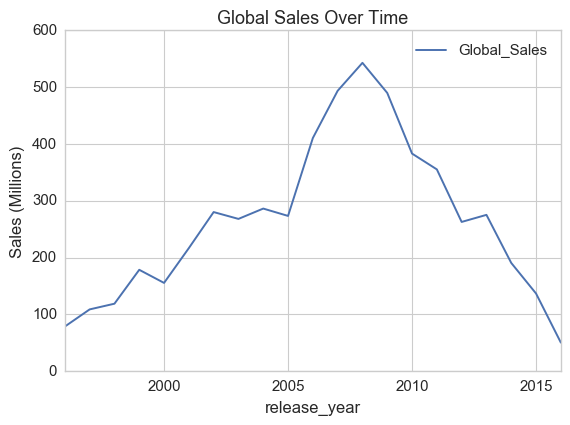

In [37]:
#how video games are doing over time 

gs = df[['release_year','Global_Sales']]
sales_overtime = gs.set_index(keys='release_year').sort_index()
sales_overtime.index = pd.to_datetime(sales_overtime.index, format='%Y')
sales_overtime.resample('A').sum().plot()
plt.title('Global Sales Over Time')
plt.ylabel('Sales (Millions)')
plt.show()

In [38]:
#most popular game(s) in 2008??
game_2008 = df[df.release_year=='2008']
game_2008.groupby(['Name','Platform','Genre'])['Global_Sales'].max().sort_values(ascending=False).head(30)

Name                                         Platform              Genre       
Mario Kart Wii                               Wii                   Racing          35.52
Wii Fit                                      Wii                   Sports          22.70
Super Smash Bros. Brawl                      Wii                   Fighting        12.84
Grand Theft Auto IV                          Xbox 360              Action          11.01
                                             PlayStation 3         Action          10.50
Call of Duty: World at War                   Xbox 360              Shooter          7.38
Gears of War 2                               Xbox 360              Shooter          6.75
Metal Gear Solid 4: Guns of the Patriots     PlayStation 3         Action           5.99
LittleBigPlanet                              PlayStation 3         Platform         5.82
Call of Duty: World at War                   PlayStation 3         Shooter          5.39
Professor Layton and the Curio

In [39]:
df.groupby(['Year_of_Release_Sales'])['Global_Sales'].sum().sort_values(ascending=False)

Year_of_Release_Sales
2008.0    485.61
2009.0    475.44
2007.0    474.81
2006.0    385.81
2010.0    358.98
2011.0    348.96
2005.0    301.48
2004.0    297.79
2002.0    286.34
2013.0    276.15
2012.0    254.52
2003.0    251.23
2001.0    222.70
2014.0    184.60
1999.0    156.14
1998.0    139.27
2015.0    131.82
1997.0    120.69
2000.0    117.54
1996.0     79.72
2016.0     48.20
1995.0     30.16
1994.0     13.76
1990.0      8.99
1986.0      8.13
1983.0      7.72
1984.0      6.48
1989.0      5.02
1993.0      4.96
1991.0      3.90
1981.0      3.27
1992.0      2.66
1988.0      2.45
1985.0      2.42
1987.0      1.77
Name: Global_Sales, dtype: float64